In [1]:
import time
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt

In [2]:
def DP_MEP(distances_array,prize_array,tot_prize,start,stop):
    n = len(distances_array)
    all_points_set = set(range(n))
    s=start ;t=stop
    
    #if tot_prize:
    tot_prize -= prize_array[t]
    #else:
     #   print("No such path")
     #    optimal_path =[]
     #  optimal_cost =0
    # memo keys: tuple(sorted_points_in_path, last_point_in_path)
    # memo values: tuple(cost_thus_far, prize thus far)
    memo = {(tuple([s]), s): tuple([s, None,prize_array[s]])}
    queue = [(tuple([s]), s)]
    paths = [tuple([s])]
    prizes= [prize_array[s]]
    
    
    if prize_array[s]>tot_prize:
        optimal_path = (s,t)
        optimal_cost = distances_array[s][t]
        prize_gathered = prize_array[s] + prize_array[t]
    else:
        to_visit = all_points_set.difference({t,})
        #print(to_visit)
        #prev_visited, prev_last_point = queue.pop(0)
        while queue:
            print(memo)
            prev_visited, prev_last_point = queue.pop(0)
            prev_dist, _ ,prev_prize= memo[(prev_visited, prev_last_point)]
            paths += [(prev_visited)]
            prizes += [prev_prize]

            to_visit = to_visit.difference(set(prev_visited))
            
            visited = list()
            prize = list() 
            dist=list()
            for new_last_point in to_visit:
                #print(new_last_point,to_visit)
                
                #print(prev_dist,distances_array[prev_last_point][new_last_point])
                #print(prev_last_point,new_last_point)
                visited += [tuple((list(prev_visited) + [new_last_point]))]
                dist += [prev_dist + distances_array[prev_last_point][new_last_point]]
                prize = prize + [prev_prize + prize_array[new_last_point]]
                #print(visited,dist,prize)
                
                
            a= dist.index(min(dist))
            new_visited = visited[a]
            new_dist = dist[dist.index(min(dist))]
            new_prize = prize[a]
           # print(new_visited,new_dist,new_prize)
            if new_prize< tot_prize:
                
                if (new_visited, new_last_point) not in memo:
                    memo[(new_visited, new_visited[-1])] = (new_dist, prev_last_point,new_prize)
                    queue += [(new_visited, new_visited[-1])]
                    prev_visited = new_visited
                    prev_last_point= new_visited[-1]
                  #  print(prev_visited,prev_last_point)
            else:
                
                optimal_path = (new_visited + (t,))
                optimal_cost = new_dist + distances_array[new_visited[-1]][t]
                prize_gathered = new_prize + prize_array[t]
            #print(memo)
    
    
    
    return optimal_path, optimal_cost, prize_gathered

In [3]:
def DP_MPP(distances_array,prize_array,dist_bound,start):
    
    
    n = len(distances_array)
    lower = 0
    upper = sum(prize_array)
      
    #print(max(prizes))
    
    #possible_paths=[]
    #possible_costs=[]
    #prizes.sort()
    X = True
    while (upper-lower)>0.0000005:
        j=1
        r= cal_reward(lower,upper)
        print(r)
        while j<n:
            optimal_path, optimal_cost, prize_gathered =DP_MEP(distances_array,prize_array,r,start,j)
            #print(max(prizes),optimal_path,optimal_cost)
     
            #prizes.remove(max(prizes))
            #print(prize_array,r)
            print(optimal_path, optimal_cost, prize_gathered)
            if optimal_cost <= dist_bound:
                lower = r
                X = False
                break
                
        
            print(upper,lower,j)
            j+=1
        if optimal_cost> dist_bound:    
            upper = r
        print(upper,lower,j)
    if (upper-lower) <= 0.0000005 and len(optimal_path)<=2 and optimal_path[-1]==n-1:
        print("No such path")
        optimal_path =[]
        optimal_cost =0
        prize_gathered = prize_array[start]    
    
    return optimal_path, optimal_cost, prize_gathered

In [4]:
def cal_reward(lower,upper):
    
        
            mid = (upper + lower)/2
            return mid

In [5]:
def plot_route(X, optimal_path):
    for p1, p2 in zip(optimal_path[:-1], optimal_path[1:]):
        plt.plot([X[p1, 0], X[p2, 0]], [X[p1, 1], X[p2, 1]]);

In [6]:
def generate_random_input(n_points):
    X = np.array([[1,19],[0,0],[1,2],[0.5,7],[7,5],[10,10],[5,1],[4,0],[5,5],[7,4]])
    distances_array = np.array([[np.linalg.norm(X[i] - X[j])
                                 for i in range(n_points)]
                                for j in range(n_points)])
    prize_array = [0.7,4,0.2,4,10.5,1,10,4,9,11.2]
    print(distances_array)
    #prize_array = list(np.floor(10*np.random.rand(6)))
    return X, distances_array, prize_array

In [7]:
input_size = 10
X, distances_array, prize_array = generate_random_input(input_size)
#tot_prize= 20
dist_bound =int(input('Enter the distance constraint'))
#dist_bound= 35
start = 0
#stop = 3

t = time.time()
optimal_path, optimal_cost, prize_gathered = DP_MPP(distances_array,prize_array,dist_bound,start)
runtime = round(time.time() - t, 3)


print(f"Found optimal path in {runtime} seconds.") 
print(f"Optimal cost: {round(optimal_cost, 3)}, optimal path: {optimal_path}")
print(f"Prize collected :{prize_gathered}")

[[ 0.         19.02629759 17.         12.01041215 15.23154621 12.72792206
  18.43908891 19.23538406 14.56021978 16.15549442]
 [19.02629759  0.          2.23606798  7.01783442  8.60232527 14.14213562
   5.09901951  4.          7.07106781  8.06225775]
 [17.          2.23606798  0.          5.02493781  6.70820393 12.04159458
   4.12310563  3.60555128  5.          6.32455532]
 [12.01041215  7.01783442  5.02493781  0.          6.80073525  9.96242942
   7.5         7.82623792  4.9244289   7.15891053]
 [15.23154621  8.60232527  6.70820393  6.80073525  0.          5.83095189
   4.47213595  5.83095189  2.          1.        ]
 [12.72792206 14.14213562 12.04159458  9.96242942  5.83095189  0.
  10.29563014 11.66190379  7.07106781  6.70820393]
 [18.43908891  5.09901951  4.12310563  7.5         4.47213595 10.29563014
   0.          1.41421356  4.          3.60555128]
 [19.23538406  4.          3.60555128  7.82623792  5.83095189 11.66190379
   1.41421356  0.          5.09901951  5.        ]
 [14.560

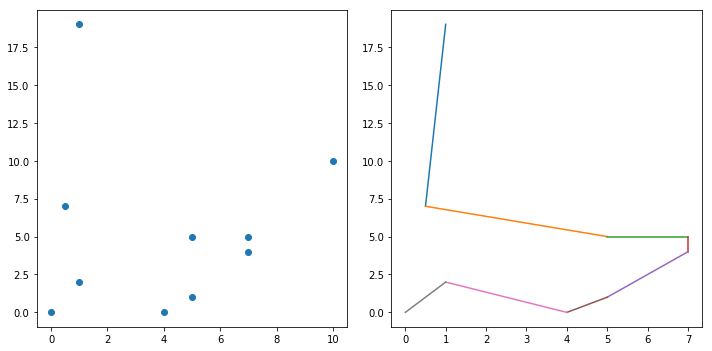

In [8]:
plt.figure(figsize=(10, 5));

plt.subplot(1, 2, 1);
plt.scatter(X[:, 0], X[:, 1]);

plt.subplot(1, 2, 2);
plot_route(X, optimal_path)

plt.tight_layout();